In [ ]:
# 폰트 깨짐 방지
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import statsmodels.graphics.tsaplots as sgt

import warnings

# 모든 경고 메시지 끄기
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.데이터 불러오기

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/삼성화재&Postech 데이터 리스크 /데이터/개화/배 개화 데이터.csv", encoding = "cp949")

# 불필요한 열 제거
data.drop(columns = ['index'], inplace=True)

# 범주화
data = pd.get_dummies(data, columns=['해양'])

# 여러 열을 동시에 datetime으로 변환
date_columns = ['배나무 개화', '서리끝']
data[date_columns] = data[date_columns].apply(pd.to_datetime)
data

,지점,연,배나무 개화,배나무 개화(평비),365,서리끝,서리끝(평비),서리365,위도,경도,...,2_평균기온(°C)_max,3_평균기온(°C)_max,2_평균기온(°C)_mean,3_평균기온(°C)_mean,2_평균기온(°C)_min,3_평균기온(°C)_min,2_합계 일조시간(hr)_sum,3_합계 일조시간(hr)_sum,해양_0.0,해양_1.0
0,강릉,1989.0,1989-04-17,5.142857,107,1989-03-26,3.45,85.0,37.762825,128.9357,...,9.6,14.6,3.696429,6.677419,-2.1,-0.2,157.4,154.0,0,1
1,강릉,1990.0,1990-04-14,2.142857,104,1990-03-26,3.45,85.0,37.762825,128.9357,...,6.6,13.3,3.200000,7.958065,-0.2,2.0,93.0,171.9,0,1
2,강릉,1991.0,1991-04-21,9.142857,111,1991-04-02,10.45,92.0,37.762825,128.9357,...,5.9,15.5,0.814286,5.454839,-9.1,0.5,166.0,141.3,0,1
3,강릉,1992.0,1992-04-04,-6.857143,95,1992-03-19,-2.55,79.0,37.762825,128.9357,...,15.5,14.2,2.865517,6.374194,-2.0,1.2,191.7,137.0,0,1
4,강릉,1993.0,1993-04-20,8.142857,110,1993-04-12,20.45,102.0,37.762825,128.9357,...,14.3,11.9,3.103571,6.090323,-3.4,-1.7,185.2,188.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,충주,2010.0,2010-04-20,4.000000,110,2010-04-17,4.00,107.0,36.970500,127.9525,...,13.7,9.3,0.496429,4.303226,-7.3,-1.5,137.5,128.5,1,0
1850,충주,2011.0,2011-04-13,-3.000000,103,2011-04-13,0.00,103.0,36.970500,127.9525,...,5.4,9.9,-0.010714,3.222581,-5.7,-2.3,153.8,242.9,1,0
1851,충주,2012.0,2012-04-19,3.000000,110,2012-04-08,-5.00,99.0,36.970500,127.9525,...,4.6,12.0,-2.496552,5.141935,-15.0,-1.6,217.8,187.2,1,0
1852,충주,2013.0,2013-04-17,1.000000,107,2013-04-13,0.00,103.0,36.970500,127.9525,...,9.1,13.2,-1.292857,5.206452,-11.6,-1.0,179.2,255.5,1,0


# 2.data preprocessing

In [ ]:
!pip install statsmodels

In [ ]:
from pprint import pprint

import seaborn as sns

from collections import defaultdict
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error


import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# 분석에 불필요한 열 제거
data1 = data.drop(columns=['배나무 개화(평비)', '서리끝'])

,지점,연,배나무 개화,365,서리끝(평비),서리365,위도,경도,고도,2_일강수량(mm)_sum,...,2_평균기온(°C)_max,3_평균기온(°C)_max,2_평균기온(°C)_mean,3_평균기온(°C)_mean,2_평균기온(°C)_min,3_평균기온(°C)_min,2_합계 일조시간(hr)_sum,3_합계 일조시간(hr)_sum,해양_0.0,해양_1.0
0,강릉,1989.0,1989-04-17,107,3.45,85.0,37.762825,128.9357,26.29,81.5,...,9.6,14.6,3.696429,6.677419,-2.1,-0.2,157.4,154.0,0,1
1,강릉,1990.0,1990-04-14,104,3.45,85.0,37.762825,128.9357,26.29,149.4,...,6.6,13.3,3.200000,7.958065,-0.2,2.0,93.0,171.9,0,1
2,강릉,1991.0,1991-04-21,111,10.45,92.0,37.762825,128.9357,26.29,50.2,...,5.9,15.5,0.814286,5.454839,-9.1,0.5,166.0,141.3,0,1
3,강릉,1992.0,1992-04-04,95,-2.55,79.0,37.762825,128.9357,26.29,11.7,...,15.5,14.2,2.865517,6.374194,-2.0,1.2,191.7,137.0,0,1
4,강릉,1993.0,1993-04-20,110,20.45,102.0,37.762825,128.9357,26.29,65.3,...,14.3,11.9,3.103571,6.090323,-3.4,-1.7,185.2,188.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,충주,2010.0,2010-04-20,110,4.00,107.0,36.970500,127.9525,114.85,70.8,...,13.7,9.3,0.496429,4.303226,-7.3,-1.5,137.5,128.5,1,0
1850,충주,2011.0,2011-04-13,103,0.00,103.0,36.970500,127.9525,114.85,45.9,...,5.4,9.9,-0.010714,3.222581,-5.7,-2.3,153.8,242.9,1,0
1851,충주,2012.0,2012-04-19,110,-5.00,99.0,36.970500,127.9525,114.85,1.7,...,4.6,12.0,-2.496552,5.141935,-15.0,-1.6,217.8,187.2,1,0
1852,충주,2013.0,2013-04-17,107,0.00,103.0,36.970500,127.9525,114.85,36.9,...,9.1,13.2,-1.292857,5.206452,-11.6,-1.0,179.2,255.5,1,0


In [ ]:
data1.columns

Index(['지점', '연', '배나무 개화', '365', '서리끝(평비)', '서리365', '위도', '경도', '고도',
       '2_일강수량(mm)_sum', '3_일강수량(mm)_sum', '2_최고기온(°C)_max', '3_최고기온(°C)_max',
       '2_최고기온(°C)_mean', '3_최고기온(°C)_mean', '2_최고기온(°C)_min',
       '3_최고기온(°C)_min', '2_최저기온(°C)_max', '3_최저기온(°C)_max', '2_최저기온(°C)_mean',
       '3_최저기온(°C)_mean', '2_최저기온(°C)_min', '3_최저기온(°C)_min', '2_평균기온(°C)_max',
       '3_평균기온(°C)_max', '2_평균기온(°C)_mean', '3_평균기온(°C)_mean',
       '2_평균기온(°C)_min', '3_평균기온(°C)_min', '2_합계 일조시간(hr)_sum',
       '3_합계 일조시간(hr)_sum', '해양_0.0', '해양_1.0'],
      dtype='object')

In [ ]:
selected_columns = ['연', '365', '서리끝(평비)', '서리365', '위도', '경도', '고도',
       '2_일강수량(mm)_sum', '3_일강수량(mm)_sum', '2_최고기온(°C)_max', '3_최고기온(°C)_max',
       '2_최고기온(°C)_mean', '3_최고기온(°C)_mean', '2_최고기온(°C)_min',
       '3_최고기온(°C)_min', '2_최저기온(°C)_max', '3_최저기온(°C)_max', '2_최저기온(°C)_mean',
       '3_최저기온(°C)_mean', '2_최저기온(°C)_min', '3_최저기온(°C)_min', '2_평균기온(°C)_max',
       '3_평균기온(°C)_max', '2_평균기온(°C)_mean', '3_평균기온(°C)_mean',
       '2_평균기온(°C)_min', '3_평균기온(°C)_min', '2_합계 일조시간(hr)_sum',
       '3_합계 일조시간(hr)_sum']

In [ ]:
preprocessed_data = data1.reindex(columns=selected_columns)

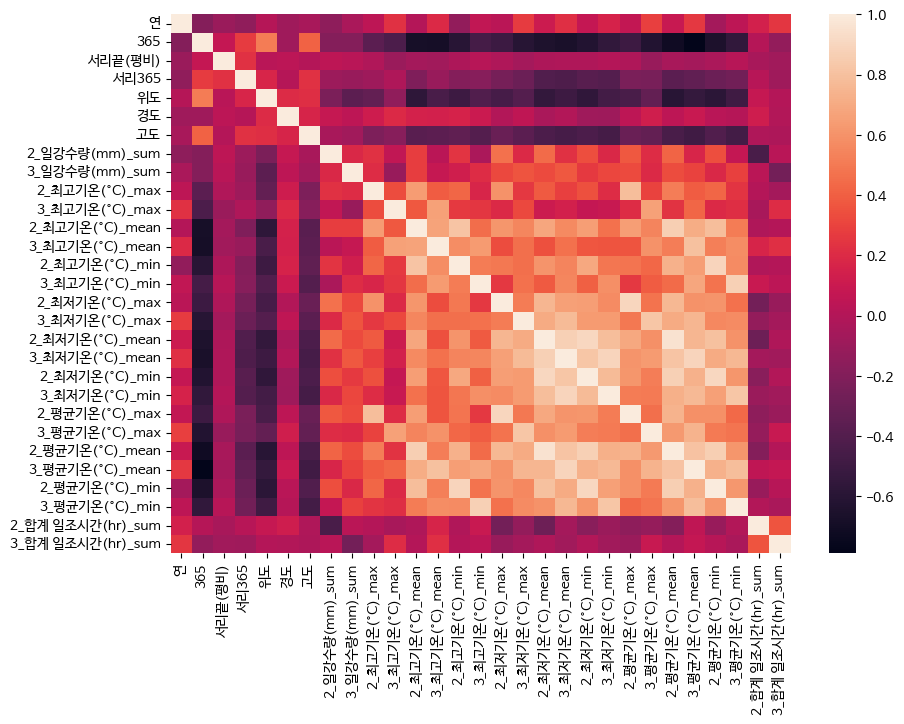

In [ ]:
def plot_correlation(corr):
    plt.figure(figsize=(10,7))
    sns.heatmap(corr)
    plt.show()

plot_correlation(preprocessed_data.corr())

1. 정규화 후 다중공산성 확인

In [ ]:
# VIF를 계산하는 함수
def calculate_vif(data_frame, excluded_variable = None):
    if excluded_variable:
      data_frame = data_frame.drop(excluded_variable, axis=1)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data.sort_values(by='VIF', ascending = False)

# # 변수 선택 함수 정의
# def select_variables(data_frame, threshold=5.0, excluded_variable=None):
#     while True:
#         vif_scores = calculate_vif(data_frame, excluded_variable)
#         max_vif = vif_scores['VIF'].max()
#         if max_vif > threshold:
#             remove_variable = vif_scores.loc[vif_scores['VIF'] == max_vif, 'Variable'].values[0]
#             data_frame = data_frame.drop([remove_variable], axis=1)
#         else:
#             break
#     return data_frame

# # VIF 계수 계산 및 변수 선택 (X2 변수 제외)
# selected_data = select_variables(preprocessed_data, excluded_variable="365")

# # 선택된 변수 확인
# selected_variables = selected_data.columns
# print("Selected Variables:", selected_variables)

In [ ]:
vif_selected_data = calculate_vif(preprocessed_data, excluded_variable = ["365","경도","연",
                                                            "3_평균기온(°C)_mean",
                                                            "2_최고기온(°C)_mean",
                                                            "3_최고기온(°C)_max",
                                                            "3_최고기온(°C)_mean",
                                                            "위도",
                                                            "2_최저기온(°C)_min",
                                                            "3_평균기온(°C)_max",
                                                            "2_최고기온(°C)_max",
                                                            "2_합계 일조시간(hr)_sum",
                                                            "2_최저기온(°C)_mean",
                                                            "2_평균기온(°C)_max",
                                                            "3_최저기온(°C)_min",
                                                            "2_평균기온(°C)_min",
                                                            "3_최저기온(°C)_max",
                                                            "3_합계 일조시간(hr)_sum",
                                                            "2_평균기온(°C)_mean",
                                                            "3_최고기온(°C)_min",
                                                            "서리365"])


In [ ]:
vif_selected_data.Variable.values

array(['2_최저기온(°C)_max', '3_최저기온(°C)_mean', '3_일강수량(mm)_sum',
       '2_일강수량(mm)_sum', '3_평균기온(°C)_min', '고도', '2_최고기온(°C)_min',
       '서리끝(평비)'], dtype=object)

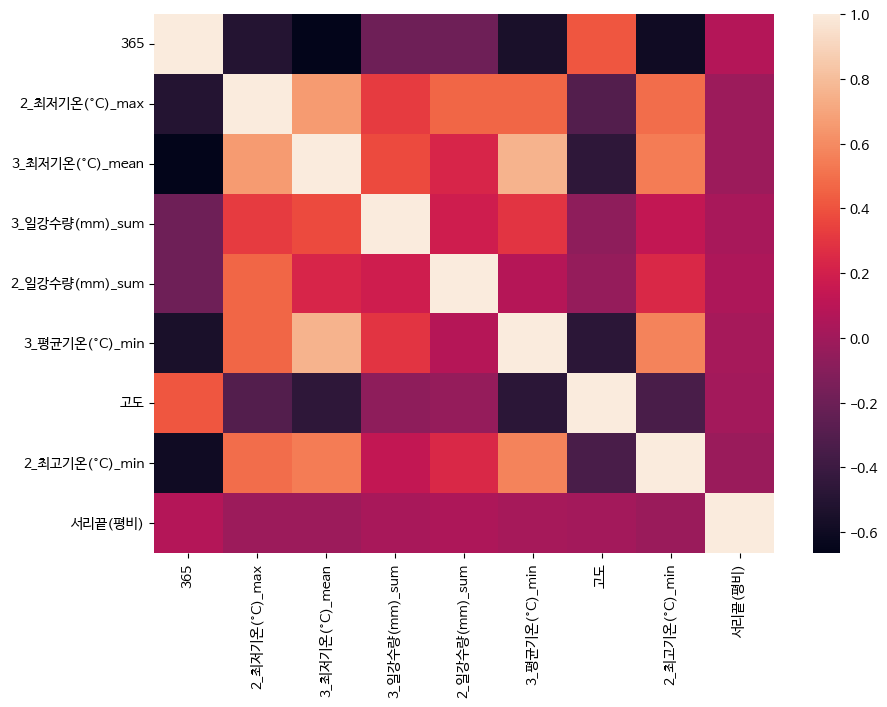

In [ ]:
vif_seleced_columns = ['365', '2_최저기온(°C)_max', '3_최저기온(°C)_mean', '3_일강수량(mm)_sum',
       '2_일강수량(mm)_sum', '3_평균기온(°C)_min', '고도', '2_최고기온(°C)_min','서리끝(평비)']

plot_correlation(data1[vif_seleced_columns].corr())

In [ ]:
import pandas as pd
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 변수 조합 생성 함수 정의
def generate_variable_combinations(data_frame):
    variables = data_frame.columns
    variable_combinations = []
    for r in range(1, len(variables) + 1):
        combinations = itertools.combinations(variables, r)
        variable_combinations.extend(combinations)
    return variable_combinations

# VIF 계산 함수 정의
def calculate_vif(data_frame, variables):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables
    vif_data["VIF"] = [variance_inflation_factor(data_frame[variables].values, i) for i in range(len(variables))]
    return vif_data

# 변수 조합 생성
all_variables = data.columns
variable_combinations = generate_variable_combinations(data)

# 각 변수 조합에 대한 VIF 계산
vif_results = []
for combination in variable_combinations:
    vif_result = calculate_vif(data, combination)
    vif_results.append((combination, vif_result))

# 결과 출력 (각 변수 조합의 VIF)
for combination, vif_result in vif_results:
    print("Variable Combination:", combination)
    print(vif_result)
    print("-" * 30)
